# Hamiltonian Monte Carlo

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

## Observations

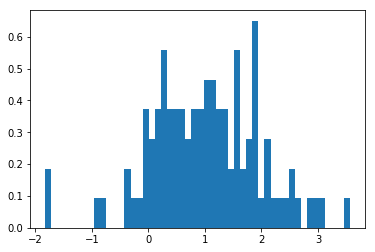

In [2]:
num_observations = 100
theta_true = 1.


N = torch.distributions.normal.Normal(theta_true, 1.)
observations = N.sample(torch.Size([num_observations])).view(-1)

plt.hist(observations.numpy(), bins=50, density=True)
plt.show()

## Posterior inference with Hamiltonian Monte Carlo

In [3]:
def log_likelihood(theta, observations):
    N = torch.distributions.normal.Normal(theta, 1.)
    likelihood = N.log_prob(observations).sum()
        
    return likelihood

In [6]:
from hypothesis.inference import Hamiltonian

leapfrog_steps = 50
leapfrog_stepsize = .01
momentum = torch.distributions.normal.Normal(0, 1)
sampler = Hamiltonian(log_likelihood, momentum, leapfrog_steps, leapfrog_stepsize)

In [7]:
theta_0 = torch.tensor(5).float()
result = sampler.infer(
    observations,
    theta_0=theta_0,
    samples=50000,
    burnin_steps=1000)

In [8]:
from hypothesis.visualization.mcmc import plot_trace
from hypothesis.visualization.mcmc import plot_autocorrelation
from hypothesis.visualization.mcmc import plot_density

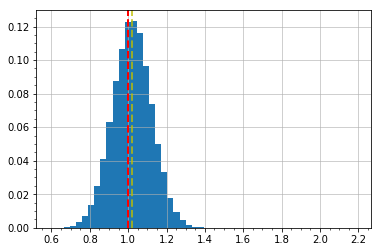

In [9]:
plot_density(result, show_mean=True, truth=theta_true, bins=50)

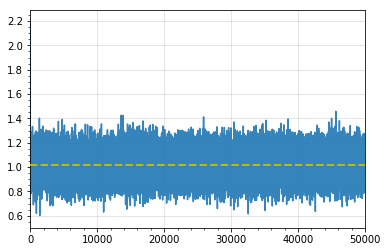

In [10]:
plot_trace(result, truth=theta_true, aspect=6, show_burnin=True, show_mean=True)
plt.show()

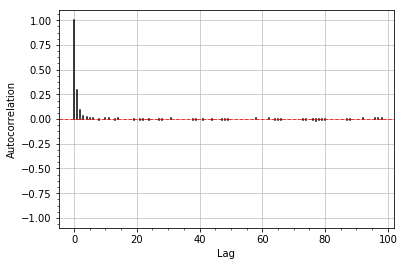

In [11]:
plot_autocorrelation(result, max_lag=100, interval=1)
plt.show()

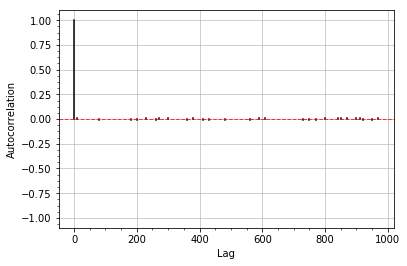

In [12]:
plot_autocorrelation(result, max_lag=1000, interval=10)
plt.show()

In [13]:
result.effective_size()

34132

In [14]:
result.efficiency()

0.68264